<a href="https://colab.research.google.com/github/Trecha/ProJect/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

In [ ]:
start=time.time()

In [ ]:
df = pd.read_csv("./power plant.csv")

In [ ]:
df.head()

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
len(df)

9568

In [ ]:
print(df.isnull().any())

T     False
V     False
AP    False
RH    False
EP    False
dtype: bool


In [ ]:
X=df.drop('EP', axis=1)
y=df['EP']
y=pd.DataFrame(y)

In [ ]:
''' Preprocessing- standard-scaling'''
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled)

In [ ]:
sc_y = StandardScaler()
y_scaled = sc_y.fit_transform(y)
y_scaled=pd.DataFrame(y_scaled)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [ ]:
X_scaled=X_scaled.values
y_scaled=y_scaled.values

In [ ]:
''' get the number of variables that gives u max adjust R sq score,
 default selector.score in linear regression = R2 '''
estimator = LinearRegression() #use regression model for regression problem
list_r2=[]
max_r2 = 0
for i in range(1,len(X_scaled[0])+1):
    selector = RFE(estimator, n_features_to_select=i, step=1)
    selector = selector.fit(X_scaled, y_scaled)
    adj_r2 = 1 - ((len(X_scaled)-1)/(len(X_scaled)-i-1))*(1-selector.score(X_scaled, y_scaled))
    list_r2.append(adj_r2)# mse = 
    if max_r2 < adj_r2:
        sel_features2 = selector.support_ # 12 features selected exactly to give max adj r2
        max_r2 = adj_r2

In [ ]:
''' optimal features to use'''        
X = X_scaled[:,sel_features2]
X = pd.DataFrame(X, columns=('T', 'V', 'AP', 'RH'))

In [ ]:
y = pd.DataFrame(y_scaled, columns=[('EP')])

In [ ]:
'''correlation matrix between X variables'''
cor_matrix=X.astype(float).corr(method='pearson')

In [ ]:
'''split data'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
'''fit linear regression to the model'''
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
y_pred = lr1.predict(X_test)
print(lr1.coef_, lr1.intercept_) 

[[-0.86158728 -0.17609519  0.02222787 -0.13522399]] [-0.00022411]


In [ ]:
'''R2 and adjusted R2 , and rmse'''
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
r2=lr1.score(X_test,y_test)
print(r2)
adj_r2 = 1 - ((len(X_test)-1)/(len(X_test)-i-1))*(1-lr1.score(X_test, y_test))
print(adj_r2)

0.9325315554761303
0.9323901862890714


In [ ]:
mse=mean_squared_error(y_test, y_pred) #biased mean
mae=mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(abs(mae))
print(rmse)

0.20898529880027125
0.2602974348064625


In [ ]:
'''summary table for coefficients'''
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression as lr
X2_train=sm.add_constant(X_train) # add a column of 1 beside x col
ols=sm.OLS(y_train.astype(float),X2_train.astype(float))# ordinary least square = linear regression
lr=ols.fit() 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.455e+04
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        00:41:49   Log-Likelihood:                -801.63
No. Observations:                7654   AIC:                             1613.
Df Residuals:                    7649   BIC:                             1648.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.003     -0.073      0.9

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
'''Cross validation'''
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
kf= KFold(n_splits=5, shuffle= True, random_state=1)
lr= lr()

In [ ]:
'''Cross validation score (R2 for test data, and full data)'''
r2score=cross_val_score(lr1,X_test,y_test, cv=kf, scoring='r2')
print(r2score.mean())
r2score_b=cross_val_score(lr,X,y, cv=kf, scoring='r2')
print(r2score_b.mean())

0.9320447596547753
0.9285086820880138


In [ ]:
'''Cross validation score (RMSE for test data, and full data)'''
RMSE=np.sqrt(-cross_val_score(lr1,X_test,y_test, cv=kf, scoring='neg_mean_squared_error'))
print(RMSE.mean())
RMSE_b=np.sqrt(-cross_val_score(lr,X,y, cv=kf, scoring='neg_mean_squared_error'))
print(RMSE_b.mean())

0.26087116315567693
0.2671856989230049


In [ ]:
'''Cross validation score (MAE for test data, and full data)'''
MAE=-cross_val_score(lr1,X_test,y_test, cv=kf, scoring='neg_mean_absolute_error')
print(MAE.mean())
MAE_b=-cross_val_score(lr,X,y, cv=kf, scoring='neg_mean_absolute_error')
print(MAE_b.mean())

0.2098443437350424
0.21257087197203064


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


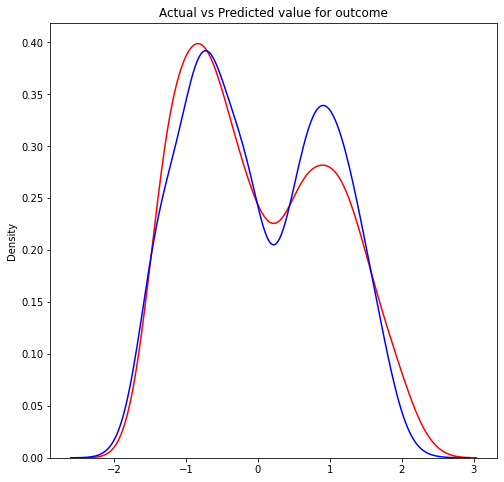

In [ ]:
plt.figure(figsize=(8, 8))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Predicted value for outcome')
plt.show()
plt.close()

In [ ]:
y_test

,EP
4834,-1.355612
1768,0.330772
2819,0.396985
7779,-0.496013
7065,-0.180182
...,...
6452,0.347179
794,-0.113969
627,1.107165
3515,-0.958919


In [ ]:
y_pred

array([[-1.34403228],
       [ 0.24588137],
       [ 0.49147937],
       ...,
       [ 0.8879209 ],
       [-0.70006696],
       [ 0.44051005]])

In [ ]:
from scipy.stats.stats import ks_2samp
from math import sqrt
k_range = range(1, 26)
rmse_val = [] #to store rmse values for different k
for X in k_range:
    model = LinearRegression()
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , X , 'is:', error)

RMSE value for k=  1 is: 0.2602974348064625
RMSE value for k=  2 is: 0.2602974348064625
RMSE value for k=  3 is: 0.2602974348064625
RMSE value for k=  4 is: 0.2602974348064625
RMSE value for k=  5 is: 0.2602974348064625
RMSE value for k=  6 is: 0.2602974348064625
RMSE value for k=  7 is: 0.2602974348064625
RMSE value for k=  8 is: 0.2602974348064625
RMSE value for k=  9 is: 0.2602974348064625
RMSE value for k=  10 is: 0.2602974348064625
RMSE value for k=  11 is: 0.2602974348064625
RMSE value for k=  12 is: 0.2602974348064625
RMSE value for k=  13 is: 0.2602974348064625
RMSE value for k=  14 is: 0.2602974348064625
RMSE value for k=  15 is: 0.2602974348064625
RMSE value for k=  16 is: 0.2602974348064625
RMSE value for k=  17 is: 0.2602974348064625
RMSE value for k=  18 is: 0.2602974348064625
RMSE value for k=  19 is: 0.2602974348064625
RMSE value for k=  20 is: 0.2602974348064625
RMSE value for k=  21 is: 0.2602974348064625
RMSE value for k=  22 is: 0.2602974348064625
RMSE value for k=  

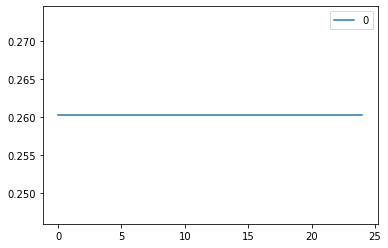

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
end=time.time()
print("Execution time=", end-start)

Execution time= 2481.341897726059
